<h1>Unsupervised Learning</h1>

<h2>Import und Datenvorverarbeitung</h2>


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

fh = pd.read_csv("framingham.csv", sep=";")
fh['Death'] = fh['Death'].replace(2,0)
fh['AnyCHD'] = fh['AnyCHD'].replace(2,0)

fh.replace(to_replace = " ", value= np.nan, inplace =True)


itarray = ('SysBP', 'BMI', 'Glucose', 'Totchol', 'HDLC', 'LDLC','DiaBP')
for column in itarray:
    fh[column] = fh[column].astype(str)
    fh[column] = fh[column].str.replace(',','.')
    fh[column]=fh[column].astype(float)

for column in fh:
    if fh[column].dtype == 'object':
        fh[column] = fh[column].astype('float')

        
values = fh.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imputer.fit_transform(values)

filledFh = pd.DataFrame(data= transformed_values, columns= fh.columns)

fh= filledFh

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
features = fh.columns
x = fh.loc[:, features].values

#skalieren der Daten auf mean=0 und Sabw. = 1
x = StandardScaler().fit_transform(x)

<h2>Principal Component Analysis</h2>

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [64]:
pc = pca.fit_transform(x)

In [65]:
pc = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])

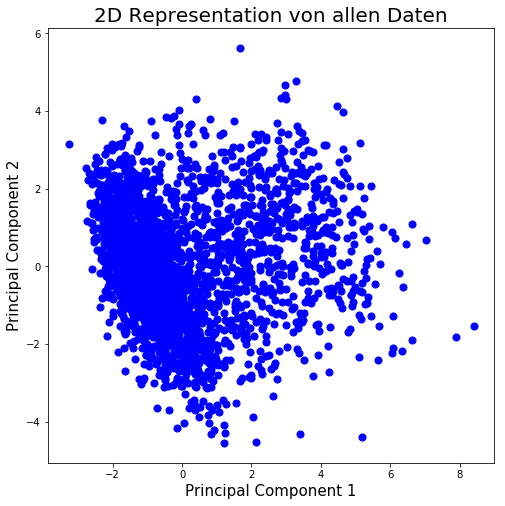

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D Representation von allen Daten', fontsize = 20)
ax.scatter(pc['principal component 1'], pc['principal component 2'], c = 'blue', s = 50)

<h2>Clustering</h2>


<h3>k-means</h3>

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [69]:
fh['kmeanscluster'] = kmeans.fit_predict(x)
fh.head()

,RandID,Sex,Age,SysBP,DiaBP,BPMeds,Cursmoke,Cigpday,Educ,Totchol,...,Glucose,Diabetes,HeartRate,PrevAP,PrevStrk,AnyCHD,TimeCHD,Death,TimeDeath,kmeanscluster
0,2448.0,1.0,52.0,121.0,66.0,0.0,0.0,0.0,4.0,209.000000,...,92.000000,0.0,69.0,0.0,0.0,1.0,1810.0,0.0,4138.0,1
1,6238.0,2.0,58.0,108.0,66.0,0.0,0.0,0.0,2.0,237.000000,...,71.000000,0.0,80.0,0.0,0.0,0.0,4422.0,0.0,4422.0,1
2,11252.0,2.0,58.0,155.0,90.0,0.0,1.0,30.0,3.0,236.005889,...,88.995428,0.0,74.0,0.0,0.0,0.0,4481.0,0.0,4481.0,1
3,11263.0,2.0,55.0,180.0,106.0,1.0,0.0,0.0,2.0,220.000000,...,81.000000,1.0,86.0,0.0,0.0,1.0,1368.0,0.0,4415.0,0
4,12806.0,2.0,57.0,110.0,46.0,0.0,1.0,30.0,2.0,320.000000,...,87.000000,0.0,75.0,0.0,0.0,0.0,4477.0,0.0,4477.0,1


In [70]:
pc = pca.fit_transform(x)
pc = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])
pc = pd.concat([pc, fh[['kmeanscluster']]], axis = 1)

In [71]:
pc.head()

,principal component 1,principal component 2,kmeanscluster
0,0.044654,1.398300,1
1,-1.713075,-0.118291,1
2,-1.130592,0.640197,1
3,3.200022,-1.682826,0
4,-2.441294,0.694715,1


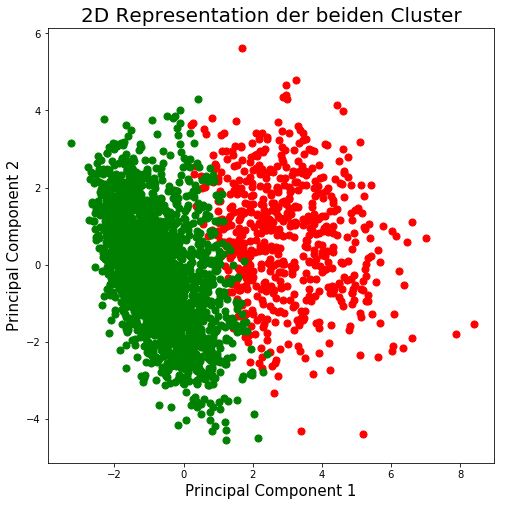

In [72]:
#plot der 2d Representation
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D Representation der beiden Cluster', fontsize = 20)

#Einfärben der beiden Cluster
color = ['r', 'g']
kcluster= [0, 1]
for kcluster, color in zip(kcluster, color):
    indicesToKeep = pc['kmeanscluster'] == kcluster
    ax.scatter(pc.loc[indicesToKeep, 'principal component 1'], pc.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

<h3>hierarchical clustering</h3>

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [74]:
linked = linkage(x, 'average')

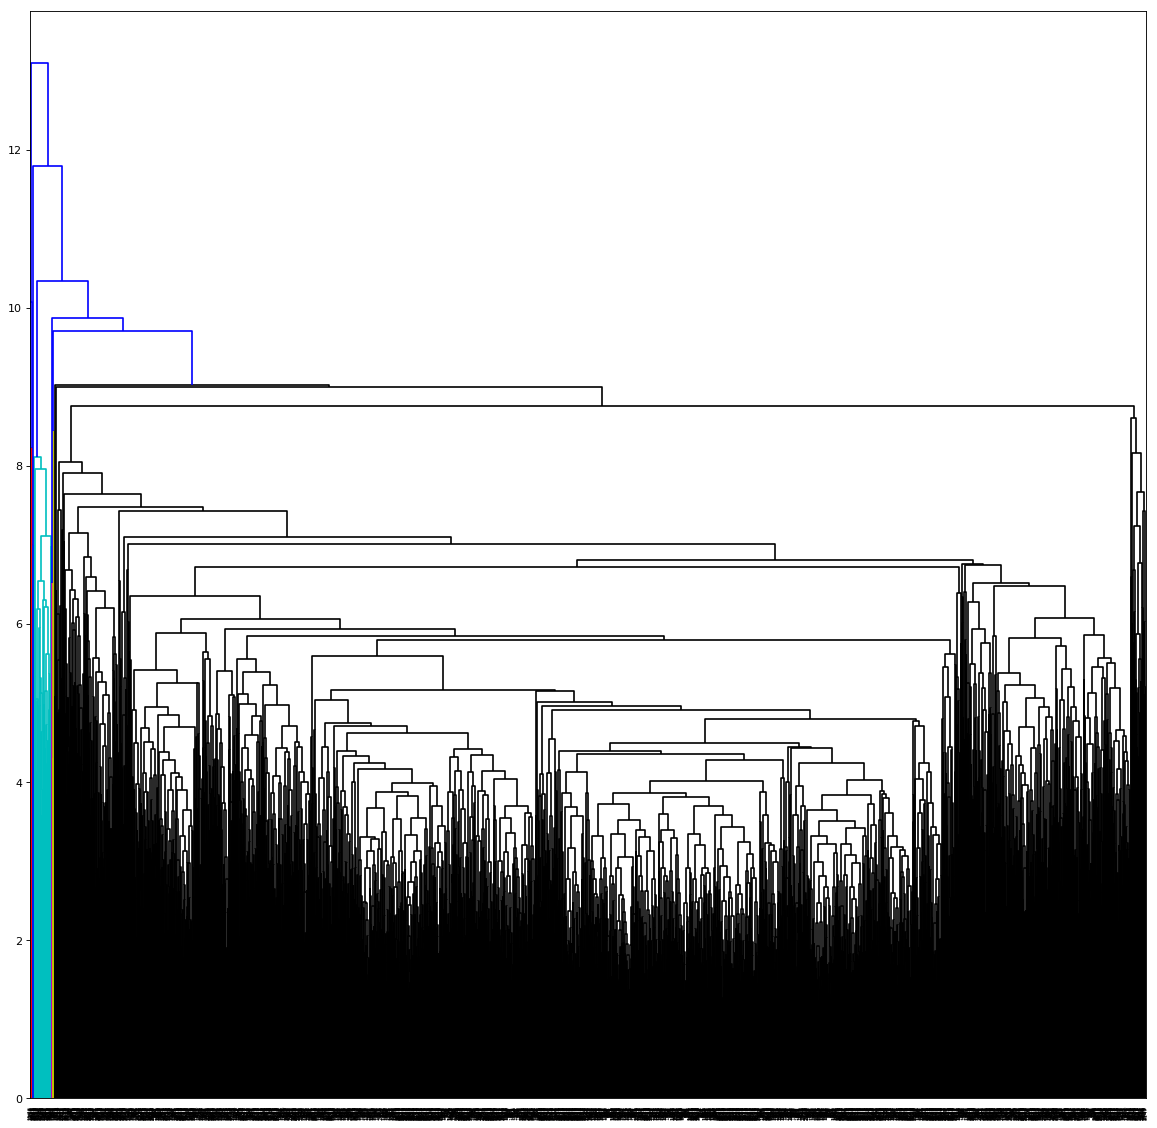

In [84]:
fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
dendrogram(linked,  orientation='top',distance_sort='descending',show_leaf_counts=False)
plt.show()  

In [85]:
hierarch = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [86]:
pc['hierarch'] = hierarch.fit_predict(x)

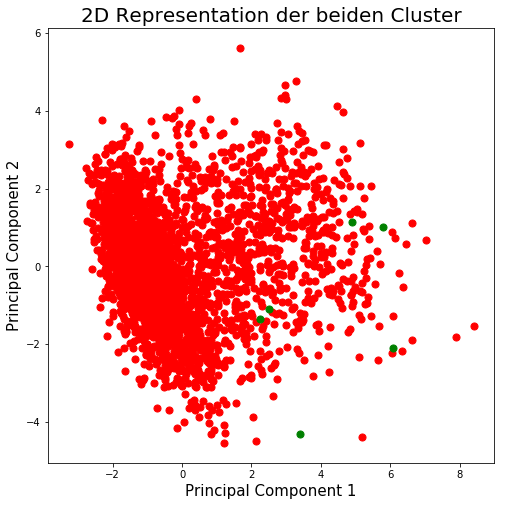

In [87]:
#plot der 2d Representation
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D Representation der beiden Cluster', fontsize = 20)

#Einfärben der beiden Cluster
color = ['r', 'g']
kcluster= [0, 1]
for kcluster, color in zip(kcluster, color):
    indicesToKeep = pc['hierarch'] == kcluster
    ax.scatter(pc.loc[indicesToKeep, 'principal component 1'], pc.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

In [83]:
pc.head()

,principal component 1,principal component 2,kmeanscluster,hierarch
0,0.044654,1.398300,1,0
1,-1.713075,-0.118291,1,0
2,-1.130592,0.640197,1,0
3,3.200022,-1.682826,0,0
4,-2.441294,0.694715,1,0
